#**Capítulo 5 - Outliers**

###**Tratamento de Outliers**

In [ ]:
df_treino.head()

,ds,y
77110,1832-01-01,24.935
77111,1832-02-01,24.505
77112,1832-03-01,24.617
77113,1832-04-01,23.990
77114,1832-05-01,23.124


In [ ]:
novo_y = df_treino.reset_index()
novo_y.head()

,index,ds,y
0,77110,1832-01-01,24.935
1,77111,1832-02-01,24.505
2,77112,1832-03-01,24.617
3,77113,1832-04-01,23.990
4,77114,1832-05-01,23.124


In [ ]:
sem_outliers = novo_y[(novo_y['y']> previsao['yhat_lower'][:2000]) & (novo_y['y'] < previsao['yhat_upper'][:2000])]
sem_outliers

,index,ds,y
0,77110,1832-01-01,24.935
1,77111,1832-02-01,24.505
2,77112,1832-03-01,24.617
3,77113,1832-04-01,23.990
4,77114,1832-05-01,23.124
...,...,...,...
1995,79121,1999-08-01,24.743
1996,79122,1999-09-01,26.109
1997,79123,1999-10-01,25.922
1998,79124,1999-11-01,25.723


In [ ]:
df_sem_outliers = sem_outliers[['ds','y']]

In [ ]:
df_sem_outliers

,ds,y
0,1832-01-01,24.935
1,1832-02-01,24.505
2,1832-03-01,24.617
3,1832-04-01,23.990
4,1832-05-01,23.124
...,...,...
1995,1999-08-01,24.743
1996,1999-09-01,26.109
1997,1999-10-01,25.922
1998,1999-11-01,25.723


Rodando o modelo sem os outliers:

In [ ]:
modelo = Prophet() 
modelo.fit(df_sem_outliers)
dataframefuturo = modelo.make_future_dataframe(periods=0)
previsao = modelo.predict(dataframefuturo)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


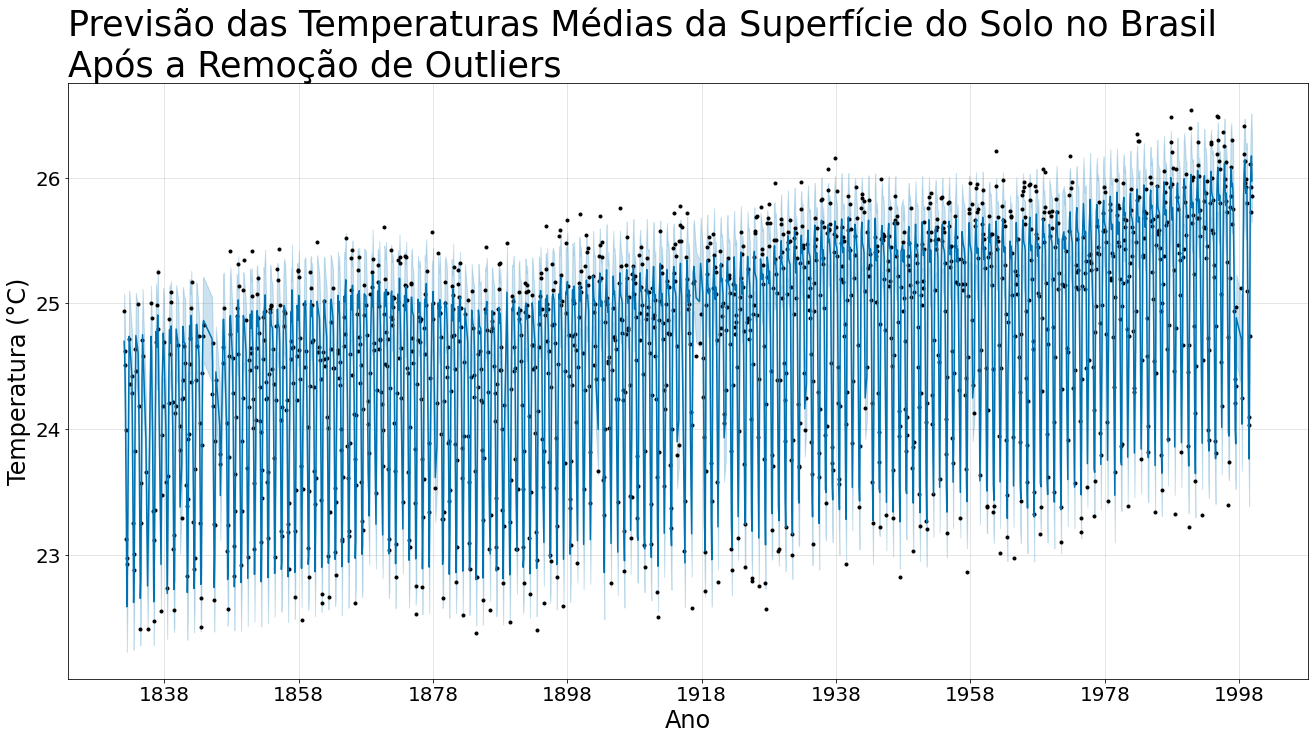

In [ ]:
modelo.plot(previsao, figsize=(18,9));
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Previsão das Temperaturas Médias da Superfície do Solo no Brasil \nApós a Remoção de Outliers', loc = 'left', fontsize = 35)
plt.xlabel('Ano', fontsize=24)
plt.ylabel('Temperatura (°C)', fontsize=24)
plt.show()

In [ ]:
mean_squared_error(y_true = df_sem_outliers['y'], y_pred=previsao['yhat'][:1637])

0.07770702380245453

###**Intervalo de Confiança**

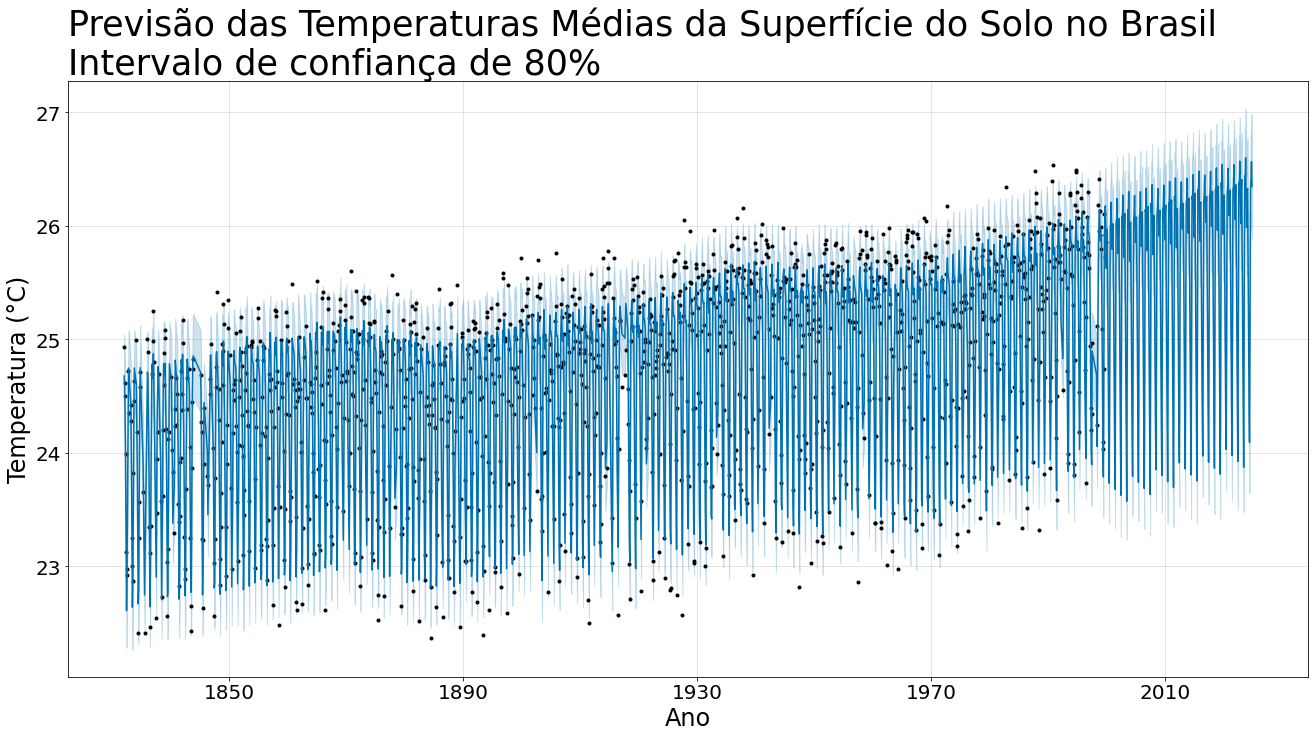

In [ ]:
modelo.plot(previsao, figsize=(18,9));
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Previsão das Temperaturas Médias da Superfície do Solo no Brasil \nIntervalo de confiança de 80%', loc = 'left', fontsize = 35)
plt.xlabel('Ano', fontsize=24)
plt.ylabel('Temperatura (°C)', fontsize=24)
plt.show()

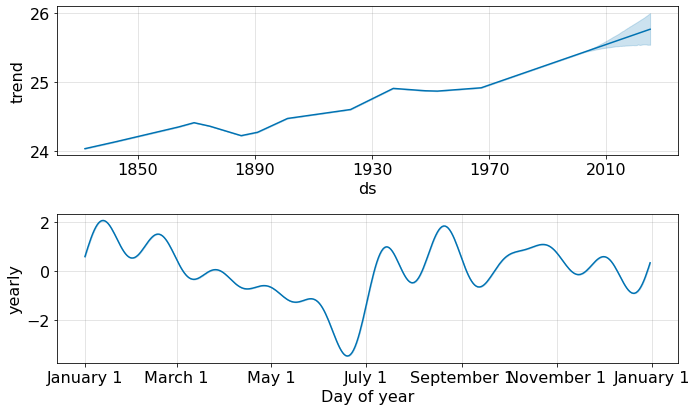

In [ ]:
modelo.plot_components(previsao, figsize=(10,6));

In [ ]:
modelo = Prophet(interval_width=0.95) 
modelo.fit(df_sem_outliers)
dataframefuturo = modelo.make_future_dataframe(periods=300, freq = 'M')
previsao = modelo.predict(dataframefuturo)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


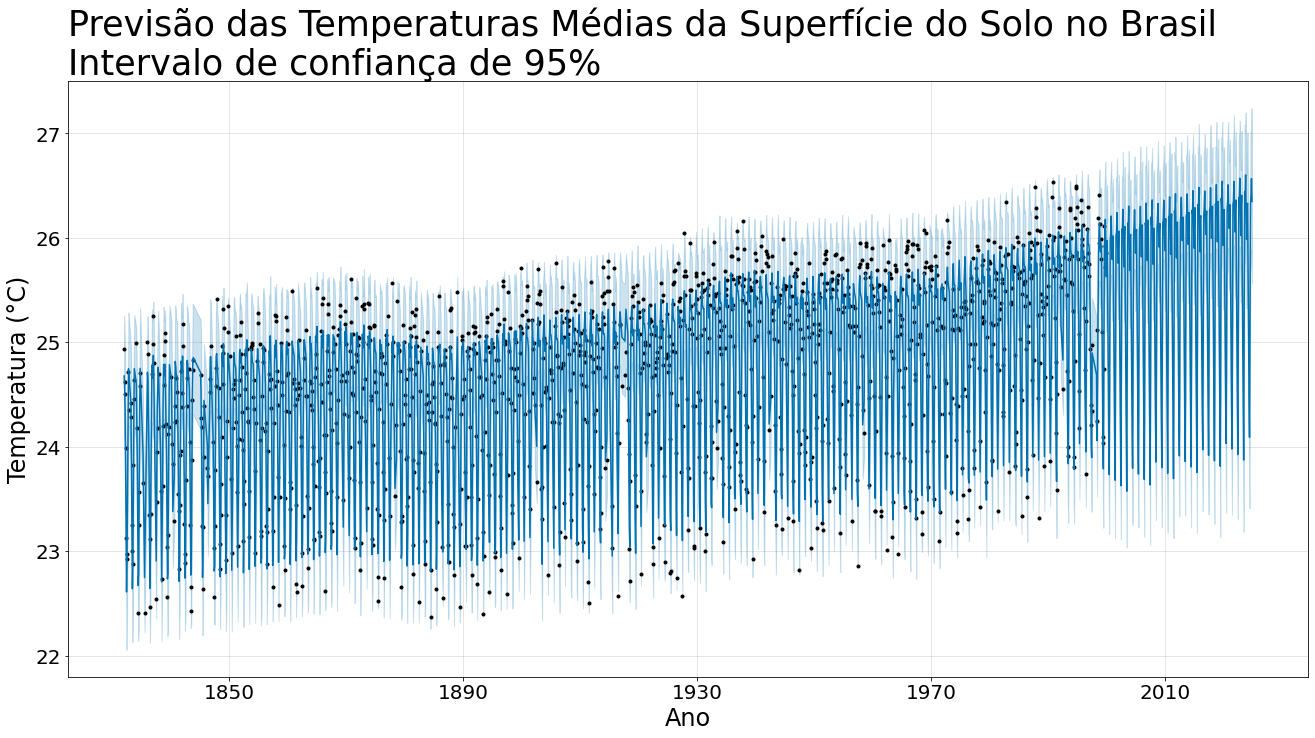

In [ ]:
modelo.plot(previsao, figsize=(18,9));
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Previsão das Temperaturas Médias da Superfície do Solo no Brasil \nIntervalo de confiança de 95%', loc = 'left', fontsize = 35)
plt.xlabel('Ano', fontsize=24)
plt.ylabel('Temperatura (°C)', fontsize=24)
plt.show()

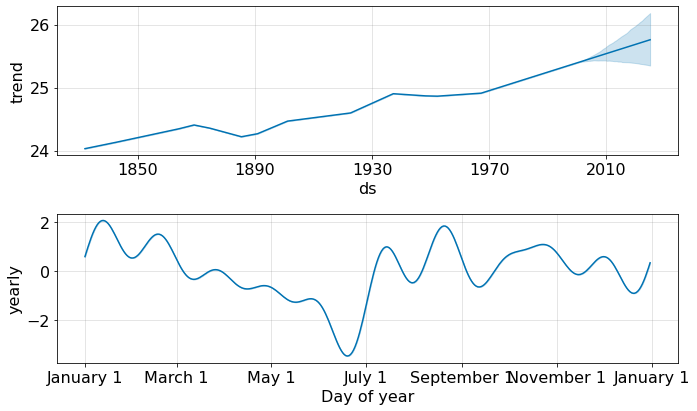

In [ ]:
modelo.plot_components(previsao, figsize=(10,6));

In [ ]:
amostras = modelo.predictive_samples(previsao)

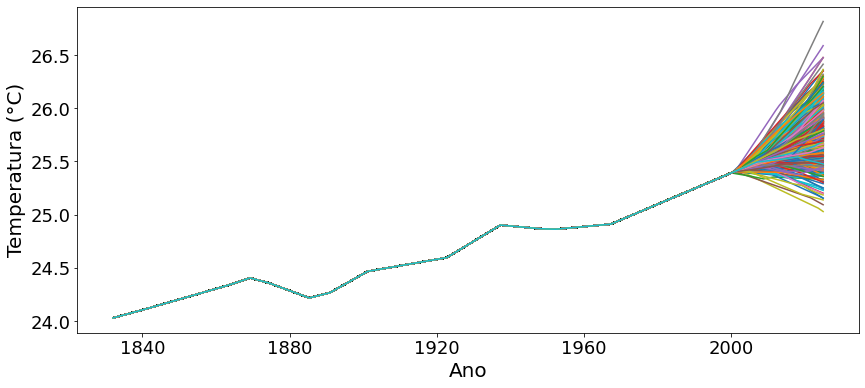

In [ ]:
plt.plot(previsao['ds'],amostras['trend']);
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Ano', fontsize=20)
plt.ylabel('Temperatura (°C)', fontsize=20)
plt.show()